### Part 3
Chose a model for a doubly stochastic system. Write the model on state space form and simulate this model.

In [ ]:
import numpy as np
# ----------------------------------------------------------------------
# Simulation Function for AR(2)-ARMA(2,1) doubly stochastic model
# ----------------------------------------------------------------------
def sim_doubly_AR2_ARMA21(T=1_000, phi1=0.5, phi2=0.2, mu=0.8,
                          varphi=0.3, sig_eps=0.5, sig_zeta=1.0,
                          seed=45, burn_in=100):
    np.random.seed(seed)
    n_sim = T + burn_in
    delta = mu * (1 - phi1 - phi2)
    Phi = np.zeros(n_sim + 2)
    zeta = np.random.normal(0, sig_zeta**2, size=n_sim+2) 
    eps = np.random.normal(0, sig_eps**2, size=n_sim+2)
    Y = np.zeros(n_sim + 2)

    Phi[0:2] = mu
    Y[0:2] = np.array([0.0, 0.0])

    for t in range(2, n_sim+2):
        Phi[t] = delta + phi1*Phi[t-1] + phi2*Phi[t-2] + zeta[t] + varphi*zeta[t-1]
        Y[t] = Phi[t]*Y[t-1] + Phi[t-1]*Y[t-2] + eps[t]

    return Y[burn_in:], Phi[burn_in:]

def check_phi_stability(phi1, phi2):
    roots = np.roots([1, -phi1, -phi2])   
    return roots, np.abs(roots)


Set 1: Baseline phi roots moduli: [0.63245553 0.63245553]


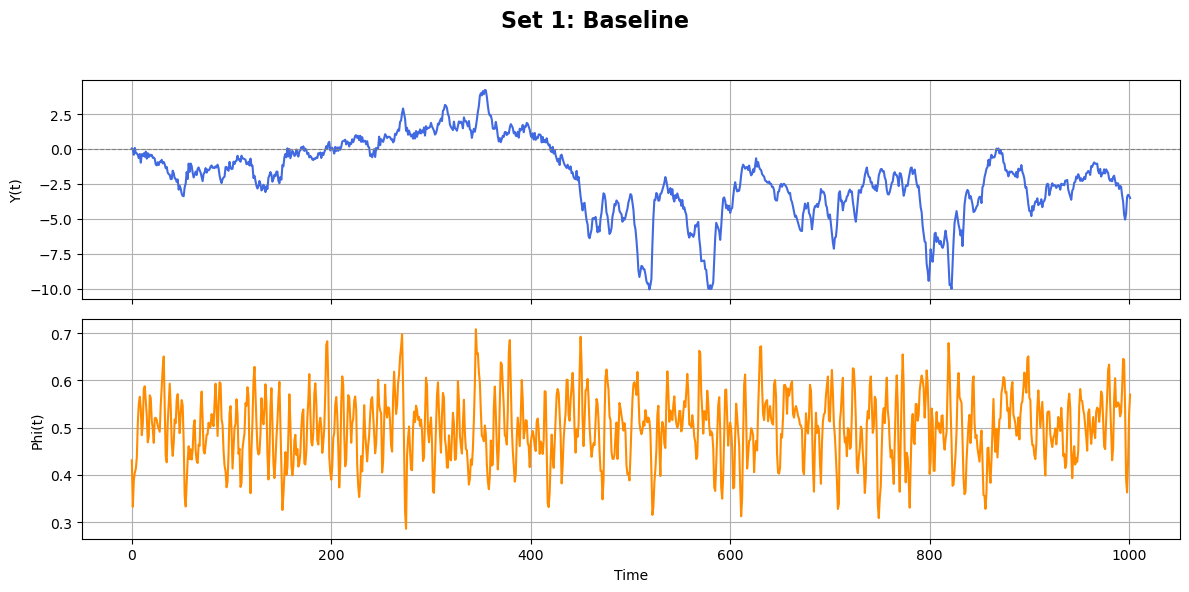

Set 2a: Change phi1 (low phi1) phi roots moduli: [0.63245553 0.63245553]


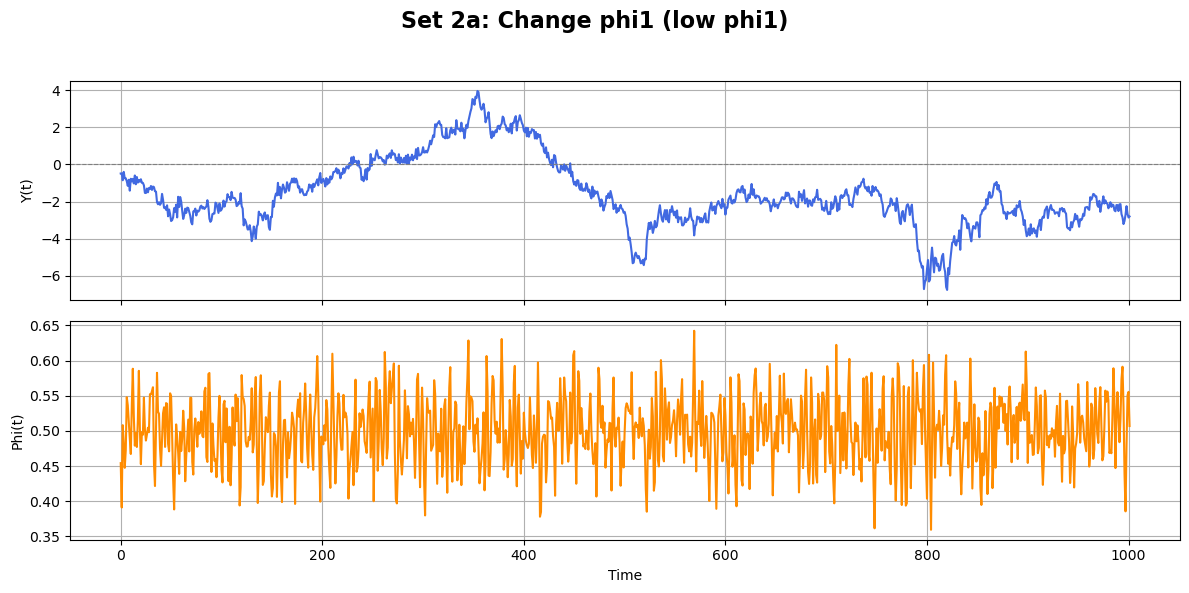

Set 2b: Change phi2 (more negative) phi roots moduli: [0.77459667 0.77459667]


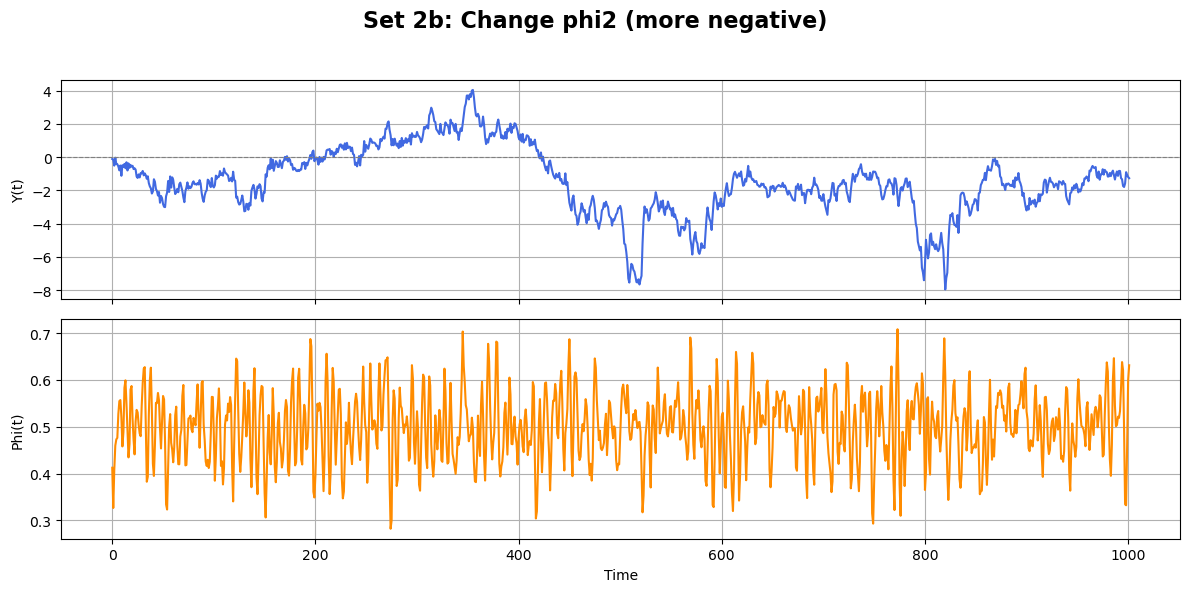

Set 3: Change MA component phi roots moduli: [0.63245553 0.63245553]


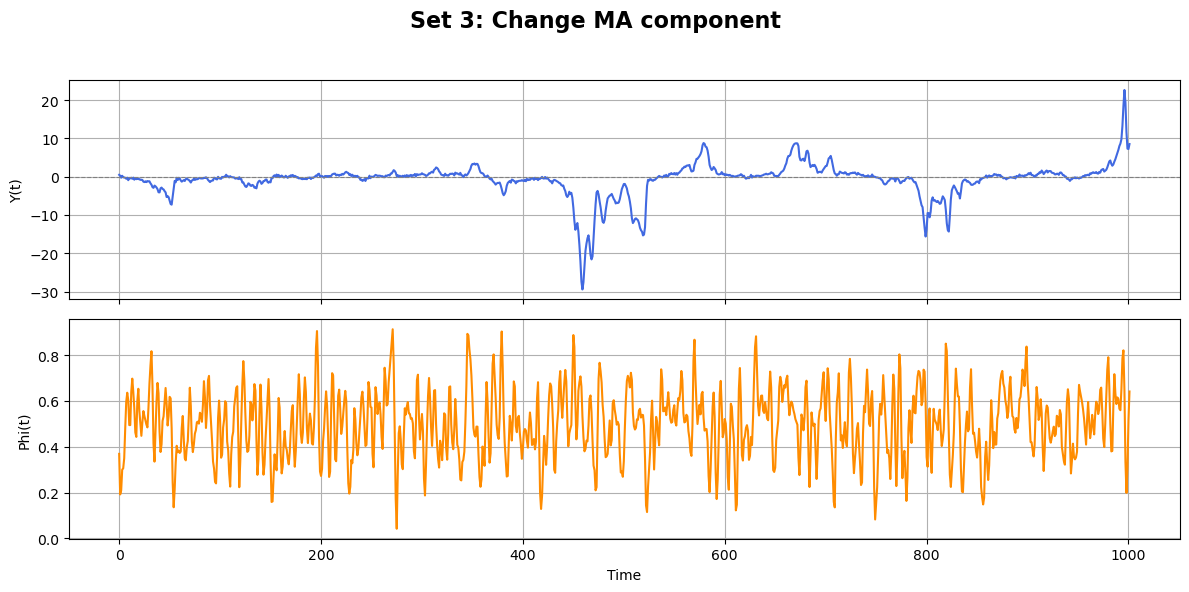

In [ ]:
import matplotlib.pyplot as plt
# ---------------------------------------------
# Different Parameters trial and plotting
# ---------------------------------------------

# parameter_sets = [
#     {'phi1': 0.9, 'phi2': -0.4, 'varphi': 0.3, 'mu': 0.5,
#      'sig_eps': 0.5, 'sig_zeta': 0.2, 'label': 'Set 1: Baseline'},

#     {'phi1': 0.2, 'phi2': -0.4, 'varphi': 0.3, 'mu': 0.5,
#      'sig_eps': 0.5, 'sig_zeta': 0.2, 'label': 'Set 2: Change phi1 component'},

#      {'phi1': 0.9, 'phi2': -0.9, 'varphi': 0.3, 'mu': 0.5,
#      'sig_eps': 0.5, 'sig_zeta': 0.2, 'label': 'Set 2: Change phi2 component'},

#     {'phi1': 0.9, 'phi2': -0.4, 'varphi': 0.8, 'mu': 0.5,
#      'sig_eps': 0.5, 'sig_zeta': 0.2, 'label': 'Set 3: Change MA component'}
# ]

parameter_sets = [
    # Set 1: Baseline (moderate dynamics)
    {'phi1': 0.90, 'phi2': -0.40, 'varphi': 0.30, 'mu': 0.50,
     'sig_eps': 0.50, 'sig_zeta': 0.20, 'label': 'Set 1: Baseline'},

    # Set 2: Change phi1 component (reduce phi1 to see effect)
    {'phi1': 0.20, 'phi2': -0.40, 'varphi': 0.30, 'mu': 0.50,
     'sig_eps': 0.50, 'sig_zeta': 0.20, 'label': 'Set 2a: Change phi1 (low phi1)'},

    # Set 2b: Change phi2 component (more negative phi2 -> stronger oscillations)
    {'phi1': 0.90, 'phi2': -0.60, 'varphi': 0.30, 'mu': 0.50,
     'sig_eps': 0.50, 'sig_zeta': 0.20, 'label': 'Set 2b: Change phi2 (more negative)'},

    # Set 3: Change MA component (increase varphi and zeta variance to see MA-driven fluctuations)
    {'phi1': 0.90, 'phi2': -0.40, 'varphi': 0.80, 'mu': 0.50,
     'sig_eps': 0.50, 'sig_zeta': 0.25, 'label': 'Set 3: Change MA component'}
]


# Simulate and plot
for i, params in enumerate(parameter_sets, 1):
    Y, Phi = sim_doubly_AR2_ARMA21(
        T=1000, phi1=params['phi1'], phi2=params['phi2'], varphi=params['varphi'],
        mu=params['mu'], sig_eps=params['sig_eps'], sig_zeta=params['sig_zeta'],
        burn_in=500
    )
    r, mod = check_phi_stability(params['phi1'], params['phi2'])
    print(params['label'], "phi roots moduli:", mod)


    fig, axes = plt.subplots(2, 1, figsize=(12,6), sharex=True)
    fig.suptitle(params['label'], fontsize=16, fontweight='bold')

    axes[0].plot(Y, color='royalblue')
    axes[0].set_ylabel('Y(t)')
    axes[0].grid(True)
    axes[0].axhline(0, color='gray', linestyle='--', linewidth=0.8)

    axes[1].plot(Phi, color='darkorange')
    axes[1].set_ylabel('Phi(t)')
    axes[1].set_xlabel('Time')
    axes[1].grid(True)

    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()